### Data Cleaning

In [14]:
from sqlalchemy import create_engine
import pandas as pd
import re
from functools import reduce

def get_info():
    sqlitedb_path = '/home/juan/IronHack/ih_datamadpt0420_project_m1/data/raw_data_project_m1.db'
    engine = create_engine(f'sqlite:///{sqlitedb_path}')
    tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", engine)
    tables_lst = tables['name'].to_list()
    x = [pd.read_sql_query(f'select * from {i}', engine) for i in tables_lst]
    df_final = reduce(lambda left,right: pd.merge(left,right,on='uuid'), x)
    df_final.to_csv(f'/home/juan/IronHack/ih_datamadpt0420_project_m1/data/raw/data_base_2.csv')
    jobs_ids = list(df_final['normalized_job_code'].unique())
    return jobs_ids

In [15]:
get_info()



([None,
  '861a9b9151e11362eb3c77ca914172d0',
  '049a3f3a2b5f85cb2971ba77ad66e10c',
  'f4b2fb1aa40f661488e2782b6d57ad2f',
  '27af8700f5577cec835acee2cb90a2ff',
  'c1b670eba9ccb65e7c99f7da116d5b9c',
  'd71c4164c99a5f9bca773e755a72f40f',
  '2ee80cf30e2483dfe0947adc0428f8c5',
  '897ef18a9321616495831a4b4b0c1bb2',
  'a003702c0cea282e17967772dd83de5e',
  '04c82eae29e1c4a30eac0710b74ab276',
  'fcaf4aac737e53ad24b9f32f08b8740f',
  '3833bd699e7afe4665b595f282da0387',
  '19e384e977796c25780d8c28b12089c4',
  '474b962c13632a04e42a546be4f11dbb',
  'dac2e921c1f887d9efc4c06fa33c1397',
  '996da29c84f5eed00da40c230f4c4078',
  'cc2b26cc436bea36bda3bdd7367c411a',
  '25fe195cbf915c0824fa6c44e6d0008c',
  '76385cb24e831b3364279b9de5641d8f',
  '16b67d7f57698455aefbc1ae1b358b50',
  'b24ece3300d2f8ab34f9553e531183d6',
  '5db2c8d6539f983e1ca3d7c5b939e190',
  '36675c937946c8a4fc5de7d0b4c850de',
  '847165cfda6b1dc82ae22b967da8af2f',
  '2ca138b991c50dc6696238e5ad800142',
  '775190277a849cba701b306a7b374c0a',
  '0

In [177]:
# to drop na jobs
#def drop_na_jobs():
#    get_info = pd.read_csv(f'/home/juan/IronHack/ih_datamadpt0420_project_m1/data/raw/data_base.csv')
#    col_to_clean = 'normalized_job_code'
#    df_clean = get_info[get_info[col_to_clean].notna()]
#    return df_clean


In [185]:
#x = drop_na_jobs()
#x

In [182]:
#x = pd.unique(x['normalized_job_code'].to_list())
#j = [i for i in x]
#l = pd.DataFrame(j)
#l.to_csv(f'/home/juan/IronHack/ih_datamadpt0420_project_m1/data/raw/jobs_ids.csv')

In [67]:
#df_career['normalized_job_code'].to_list()

### TO CLEAN

To change:
    1. age 
    2. gender
    3. age_group (!)
    

In [70]:
from sqlalchemy import create_engine
import pandas as pd
import re
from functools import reduce
def get_all_data():
    df = pd.read_csv('/home/juan/IronHack/ih_datamadpt0420_project_m1/data/raw/all_data_merged.csv')
    return df

In [71]:
df = get_all_data()

In [72]:
def clean_data(df):
    #print('Cleaning the merged dataframe')
    # cleaning the age column
    df['age'] = df['age'].apply(lambda age: re.sub('[a-z]', '', age))
    df = df.astype({'age': int})
    df['age'] = df['age'].apply(lambda age: age if age < 250 else 2016 - age)
    df['age_group'] = df['age_group'].apply(lambda group: group if group != 'juvenile' else '14_25')

    # cleaning the gender column
    df['gender'] = df['gender'].str.lower()
    df['gender'] = df['gender'].str.replace(r'\b[f]\w+', 'female')
    df['gender'] = df['gender'].str.replace(r'\b[m]\w+', 'male')

    # cleaning the dem_has_children column
    df['dem_has_children'] = df['dem_has_children'].str.lower()
    df['dem_has_children'] = df['dem_has_children'].str.replace(r'\b[y]\w+', 'yes')
    df['dem_has_children'] = df['dem_has_children'].str.replace(r'\b[m]\w+', 'no')

    # cleaning the rural column
    df['rural'] = df['rural'].str.lower()
    df['rural'] = df['rural'].str.replace(r'\b[ci]\w+', 'urban').replace(r'\b[count]\w+', 'no').replace('non-rural', 'rural')

    #print('Cleaning finished')
    return df

In [73]:
df_1 = clean_data(df)
df_1


,uuid,age,gender,dem_has_children,age_group,country_code,rural,dem_education_level,dem_full_time_job,normalized_job_code,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,English short name (using title case),title,normalized_job_title,parent_uuid
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,no,40_65,AT,urban,no,no,NaN,I know something about it,I would not vote,None of the above,None of the above,None of the above,Austria,NaN,NaN,NaN
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,yes,40_65,AT,urban,high,yes,861a9b9151e11362eb3c77ca914172d0,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,Austria,Automatic Data Processing Planner,automatic data processing planner,0148f61d4227497728ce33490843d056
2,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,no,26_39,AT,urban,NaN,no,NaN,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,Austria,NaN,NaN,NaN
3,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,yes,40_65,AT,urban,high,yes,049a3f3a2b5f85cb2971ba77ad66e10c,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,Austria,Data Coordinator,data coordinator,0b9dd32a367f4562ec77b993053d1910
4,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,yes,40_65,AT,urban,high,yes,f4b2fb1aa40f661488e2782b6d57ad2f,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,Austria,Database Developer,database developer,b90ca4df5690002377a7b0f1f3d40781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,7d1ac020-dcb4-0133-817a-0a81e8b09a82,37,female,no,26_39,SK,urban,high,yes,847165cfda6b1dc82ae22b967da8af2f,I understand it fully,I would probably vote for it,‰Û_ spend more time with my family,It reduces bureaucracy and administrative expe...,It is impossible to finance,Slovakia,Data Warehouse Developer,data warehouse developer,72ac7ec4ef0212a3aa54ed92abac8a92
9645,39f989f0-db52-0133-8482-0a81e8b09a82,53,male,yes,40_65,SK,urban,high,yes,a4d5b8b38f9513825d0d94a981ebe962,I have never heard of it,I would probably vote against it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,It might encourage people to stop working | On...,Slovakia,Database Manager,database manager,b90ca4df5690002377a7b0f1f3d40781
9646,70ce4a90-d965-0133-f5e4-0a81e8b09a82,24,male,no,14_25,SK,rural,low,no,NaN,I have heard just a little about it,I would not vote,‰Û_ spend more time with my family,It reduces anxiety about financing basic needs,None of the above,Slovakia,NaN,NaN,NaN
9647,2896e440-db3c-0133-5b67-0a81e8b09a82,47,male,yes,40_65,SK,urban,low,yes,775190277a849cba701b306a7b374c0a,I understand it fully,I would vote for it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,Foreigners might come to my country and take a...,Slovakia,Data Officer,data officer,596226d5f9ef63de41a852826d483d19


In [24]:

def analysis_data(df_1,countries):
    df = df_1[df_1['title'].notna()]
    df2 = df[df['English short name (using title case)'].isin(countries)]
    df3 = df2[['English short name (using title case)', 'title', 'age_group', 'uuid', 'country_code']]
    k = pd.DataFrame(df3.groupby(['English short name (using title case)', 'title','age_group']).size()).reset_index()
    k = k.rename(columns={0: 'counts'})
    k['percetange'] = k['counts'].apply(lambda x: '{:.3%}'.format((x)/k['counts'].sum()))
    #k.to_csv(f'/home/juan/IronHack/ih_datamadpt0420_project_m1/data/results/prueba.csv')
    return k


In [25]:
countries = ['Spain', 'Austria']
q = analysis_data(df_1, countries)
q

,English short name (using title case),title,age_group,counts,percetange
0,Austria,Automatic Data Processing Customer Liaison (AD...,26_39,1,0.152%
1,Austria,Automatic Data Processing Customer Liaison (AD...,40_65,1,0.152%
2,Austria,Automatic Data Processing Planner,40_65,2,0.305%
3,Austria,Automatic Data Processing Systems Security Spe...,26_39,1,0.152%
4,Austria,Automatic Data Processing Systems Security Spe...,40_65,1,0.152%
...,...,...,...,...,...
292,Spain,Survey Data Technician,14_25,1,0.152%
293,Spain,Voice and Data Technician,14_25,1,0.152%
294,Spain,Voice and Data Technician,40_65,1,0.152%
295,Spain,Weight in Motion Field Data Collection Technician,26_39,3,0.457%


### BONUS

In [86]:
df_2 = df_1[df_1['question_bbi_2016wave4_basicincome_vote'].isin(['I would vote for it','I would vote against it'])]
x = pd.DataFrame(df_2.groupby(['English short name (using title case)', 'question_bbi_2016wave4_basicincome_vote']).size()).reset_index()
x = x.rename(columns={0: 'counts'})
#x['percetange'] = x['counts'].apply(lambda j: '{:.0%}'.format((j)/x['counts'].sum()))
x

,English short name (using title case),question_bbi_2016wave4_basicincome_vote,counts
0,Austria,I would vote against it,13
1,Austria,I would vote for it,31
2,Belgium,I would vote against it,21
3,Belgium,I would vote for it,47
4,Bulgaria,I would vote against it,4
5,Bulgaria,I would vote for it,62
6,Croatia,I would vote against it,2
7,Croatia,I would vote for it,32
8,Cyprus,I would vote against it,2
9,Cyprus,I would vote for it,7


In [89]:
df_2 = df_1[df_1['question_bbi_2016wave4_basicincome_vote'].isin(['I would vote for it','I would vote against it'])]
x = pd.DataFrame(df_2.groupby(['rural', 'question_bbi_2016wave4_basicincome_vote']).size()).reset_index()
x = x.rename(columns={0: 'counts'})
x['percetange'] = x['counts'].apply(lambda j: '{:.0%}'.format((j)/x['counts'].sum()))
x

,rural,question_bbi_2016wave4_basicincome_vote,counts,percetange
0,rural,I would vote against it,309,8%
1,rural,I would vote for it,818,22%
2,urban,I would vote against it,651,17%
3,urban,I would vote for it,2001,53%


In [67]:
x['yes'] = x['question_bbi_2016wave4_basicincome_vote'].apply(lambda o:'yes' if x['question_bbi_2016wave4_basicincome_vote'].any('I would probably vote for it','I would vote for it') else 'no')
x

ValueError: No axis named I would probably vote for it for object type <class 'pandas.core.series.Series'>

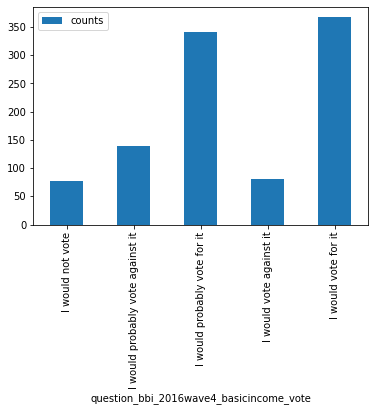

In [42]:
x.plot.bar(x='question_bbi_2016wave4_basicincome_vote', y='counts')

In [34]:
x = df_1.groupby(['English short name (using title case)']).count()
x

,uuid,age,gender,dem_has_children,age_group,country_code,rural,dem_education_level,dem_full_time_job,normalized_job_code,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,title,normalized_job_title,parent_uuid
English short name (using title case),,,,,,,,,,,,,,,,,,
Austria,133,133,133,133,133,133,133,120,133,74,133,133,133,133,133,74,74,74
Belgium,179,179,179,179,179,179,179,164,179,103,179,179,179,179,179,103,103,103
Bulgaria,141,141,141,141,141,141,141,137,141,96,141,141,141,141,141,96,96,96
Croatia,87,87,87,87,87,87,87,84,87,49,87,87,87,87,87,49,49,49
Cyprus,13,13,13,13,13,13,13,13,13,8,13,13,13,13,13,8,8,8
Czechia,189,189,189,189,189,189,189,178,189,130,189,189,189,189,189,130,130,130
Denmark,119,119,119,119,119,119,119,100,119,71,119,119,119,119,119,71,71,71
Estonia,18,18,18,18,18,18,18,17,18,10,18,18,18,18,18,10,10,10
Finland,113,113,113,113,113,113,113,109,113,75,113,113,113,113,113,75,75,75


In [56]:
a = df_1['question_bbi_2016wave4_basicincome_argumentsfor'].to_list()
all_r = []
for i in a:
    all_r.append(i.split("|"))
    

flat_list = [item.strip() for sublist in all_r for item in sublist]



j = [[x,flat_list.count(x)] for x in set(flat_list)]
pd.DataFrame(j)

,0,1
0,It encourages financial independence and self-...,269
1,It increases appreciation for household work a...,198
2,It creates more equality of opportunity,361
3,"It increases solidarity, because it is funded ...",292
4,It reduces anxiety about financing basic needs,447
5,None of the above,189
6,It reduces bureaucracy and administrative expe...,120


In [55]:
a = df_1['question_bbi_2016wave4_basicincome_argumentsagainst'].to_list()
all_r = []
for i in a:
    all_r.append(i.split("|"))
    

flat_list = [item.strip() for sublist in all_r for item in sublist]


j = [[x,flat_list.count(x)] for x in set(flat_list)]
pd.DataFrame(j)

,0,1
0,It increases dependence on the state,265
1,Only the people who need it most should get so...,411
2,It is against the principle of linking merit a...,167
3,Foreigners might come to my country and take a...,370
4,It is impossible to finance,379
5,None of the above,106
6,It might encourage people to stop working,469


In [250]:
import matplotlib

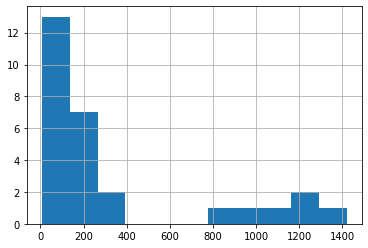

In [263]:
x.hist(bins=11)